In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
pd.set_option("display.precision", 2)
%matplotlib inline

import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [122]:
df = pd.read_csv("/home/leslie/code/melanoma_files/train.csv")
df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [123]:
# Creating new columns for "female", "male", "head/neck", etc.
df["female"] = [1 if x == 'female' else 0 for x in df['sex']]
df["male"] = [1 if x == 'male' else 0 for x in df['sex']]

df["head_neck"] = [1 if x == 'head/neck' else 0 for x in df['anatom_site_general_challenge']]
df["torso"] = [1 if x == 'torso' else 0 for x in df['anatom_site_general_challenge']]
df["lower_extremity"] = [1 if x == 'lower extremity' else 0 for x in df['anatom_site_general_challenge']]
df["upper_extremity"] = [1 if x == 'upper extremity' else 0 for x in df['anatom_site_general_challenge']]
df["palms_soles"] = [1 if x == 'palms/soles' else 0 for x in df['anatom_site_general_challenge']]
df["oral_genital"] = [1 if x == 'oral/genital' else 0 for x in df['anatom_site_general_challenge']]      

df.head()

# Getting rid of a few columns like "image_name", etc.
df=df.drop(columns=['image_name','patient_id', 'sex', 'anatom_site_general_challenge','benign_malignant','diagnosis'])


In [124]:
df.head()

,age_approx,target,female,male,head_neck,torso,lower_extremity,upper_extremity,palms_soles,oral_genital
0,45.0,0,0,1,1,0,0,0,0,0
1,45.0,0,1,0,0,0,0,1,0,0
2,50.0,0,1,0,0,0,1,0,0,0
3,45.0,0,1,0,1,0,0,0,0,0
4,55.0,0,1,0,0,0,0,1,0,0


In [125]:
X = df.loc[:,df.columns!='target']
y = df.target

In [126]:
X.head()

,age_approx,female,male,head_neck,torso,lower_extremity,upper_extremity,palms_soles,oral_genital
0,45.0,0,1,1,0,0,0,0,0
1,45.0,1,0,0,0,0,1,0,0
2,50.0,1,0,0,0,1,0,0,0
3,45.0,1,0,1,0,0,0,0,0
4,55.0,1,0,0,0,0,1,0,0


In [127]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [128]:
print(X.shape)
print(y.shape)

(33126, 9)
(33126,)


## Splitting up the train.csv into "train" and "test" data.

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [140]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(24844, 9)
(24844,)
(8282, 9)
(8282,)


In [141]:
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [142]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## The table below shows how much different variables will affect the model's predictions. For example, the approximate age (~ 20%) has the biggest effect on the model's predictions.

In [145]:
pd.DataFrame(regressor.feature_importances_.reshape(1, -1), columns=X.columns)

,age_approx,female,male,head_neck,torso,lower_extremity,upper_extremity,palms_soles,oral_genital
0,0.19,0.1,0.05,0.14,0.05,0.11,0.17,0.17,0.03


In [146]:
y_pred = regressor.predict(X_test)

In [147]:
mean_squared_error(y_test, y_pred)

0.018038578551277423

## This shows that the model has a great accuracy of 98.15%

In [149]:
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.15%


# Bringing in the test.csv file:

In [152]:
df = pd.read_csv("/home/leslie/code/melanoma_files/test.csv")
df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


In [153]:
df_image_ids = df['image_name']
df_image_ids

0        ISIC_0052060
1        ISIC_0052349
2        ISIC_0058510
3        ISIC_0073313
4        ISIC_0073502
             ...     
10977    ISIC_9992485
10978    ISIC_9996992
10979    ISIC_9997917
10980    ISIC_9998234
10981    ISIC_9999302
Name: image_name, Length: 10982, dtype: object

In [154]:
df["female"] = [1 if x == 'female' else 0 for x in df['sex']]
df["male"] = [1 if x == 'male' else 0 for x in df['sex']]

df["head_neck"] = [1 if x == 'head/neck' else 0 for x in df['anatom_site_general_challenge']]
df["torso"] = [1 if x == 'torso' else 0 for x in df['anatom_site_general_challenge']]
df["lower_extremity"] = [1 if x == 'lower extremity' else 0 for x in df['anatom_site_general_challenge']]
df["upper_extremity"] = [1 if x == 'upper extremity' else 0 for x in df['anatom_site_general_challenge']]
df["palms_soles"] = [1 if x == 'palms/soles' else 0 for x in df['anatom_site_general_challenge']]
df["oral_genital"] = [1 if x == 'oral/genital' else 0 for x in df['anatom_site_general_challenge']]      


df=df.drop(columns=['image_name','patient_id', 'sex', 'anatom_site_general_challenge'])

df.head()


,age_approx,female,male,head_neck,torso,lower_extremity,upper_extremity,palms_soles,oral_genital
0,70.0,0,1,0,0,0,0,0,0
1,40.0,0,1,0,0,1,0,0,0
2,55.0,1,0,0,1,0,0,0,0
3,50.0,1,0,0,1,0,0,0,0
4,45.0,1,0,0,0,1,0,0,0


In [155]:
y_pred = regressor.predict(df)

In [156]:
print(y_pred)

[0.03438175 0.00766346 0.0088976  ... 0.02069619 0.02343473 0.02100572]


In [157]:
y_pred.max()

0.62756634

In [158]:
y_pred.min()

-0.010070264

In [159]:
len(y_pred)

10982

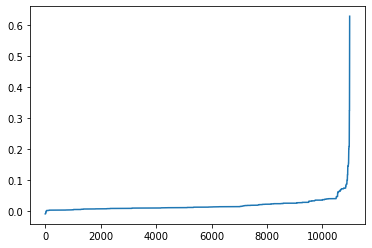

In [160]:
plt.plot(np.sort(y_pred))

(array([8.145e+03, 2.399e+03, 3.270e+02, 3.900e+01, 2.200e+01, 1.300e+01,
        2.200e+01, 0.000e+00, 0.000e+00, 0.000e+00, 9.000e+00, 1.000e+00,
        0.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-0.01007026,  0.02181157,  0.0536934 ,  0.08557522,  0.11745705,
         0.14933889,  0.18122071,  0.21310255,  0.24498437,  0.2768662 ,
         0.30874804,  0.34062988,  0.37251168,  0.40439352,  0.43627536,
         0.46815717,  0.50003904,  0.53192085,  0.56380266,  0.5956845 ,
         0.62756634], dtype=float32),
 <a list of 20 Patch objects>)

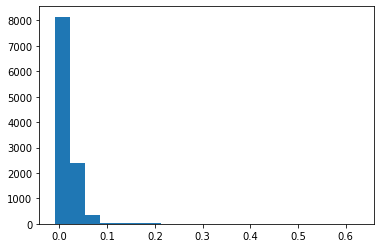

In [161]:
plt.hist(y_pred, bins = 20)

In [162]:
df_y = pd.DataFrame(data=y_pred,columns=['target'])

In [163]:
result = pd.concat([df_image_ids, df_y], axis=1, sort=False)

In [164]:
result

,image_name,target
0,ISIC_0052060,3.44e-02
1,ISIC_0052349,7.66e-03
2,ISIC_0058510,8.90e-03
3,ISIC_0073313,8.72e-03
4,ISIC_0073502,9.06e-03
...,...,...
10977,ISIC_9992485,2.16e-03
10978,ISIC_9996992,5.84e-03
10979,ISIC_9997917,2.07e-02
10980,ISIC_9998234,2.34e-02


In [165]:
# result.to_csv('submission.csv')